# Initial Exploratory Data Analysis
In this notebook, we will show some initial exploratory data analysis as well as a "back-of-envelope" model.

In [29]:
# imports
import pandas as pd
import statsmodels.api as sm

In [30]:
# load dataset
df1 = pd.read_csv("../data/raw/data2016-2025.csv", index_col='date')
df2 = pd.read_csv("../data/raw/data2006-2015.csv", index_col='date')
df3 = pd.read_csv("../data/raw/data1996-2005.csv", index_col='date')
df4 = pd.read_csv("../data/raw/data1986-1995.csv", index_col='date')
df5 = pd.read_csv("../data/raw/data1976-1985.csv", index_col='date')

In [ ]:
df = pd.concat([df1,df2, df3, df4, df5]).drop_duplicates()
df = df.sort_index()
pd.set_option("display.max_rows", None)
df.info()

In [33]:
df.tail()

,CUUR0000SEFA01,CUUR0000SEFA02,CUUR0000SEFA03,CUUR0000SEFB01,CUUR0000SEFB02,CUUR0000SEFB03,CUUR0000SEFB04,CUUR0000SEFC01,CUUR0000SEFC02,CUUR0000SEFC03,...,CUUR0000SEFD03,CUUR0000SEFD04,CUUR0000SEFF01,CUUR0000SEFF02,CUUR0000SEFG01,CUUR0000SEFG02,CUUR0000SEFJ01,CUUR0000SEFJ02,CUUR0000SEFJ03,CUUR0000SEFJ04
date,,,,,,,,,,,,,,,,,,,,,
2025-04-01,326.444,274.000,286.780,241.021,238.548,376.478,353.943,389.127,368.120,301.948,...,241.461,160.068,199.157,206.261,222.835,172.072,180.510,267.886,271.864,192.102
2025-05-01,333.819,279.450,290.520,240.101,242.079,378.984,360.252,392.881,368.169,301.002,...,242.503,161.371,200.389,206.678,222.848,175.733,178.574,268.182,271.525,193.260
2025-06-01,333.022,278.493,286.660,240.298,242.051,378.429,362.847,398.674,377.830,313.220,...,245.568,160.697,202.872,206.087,224.377,175.508,177.239,268.617,274.499,190.370
2025-07-01,329.727,276.469,286.128,241.244,241.018,384.948,360.341,408.345,386.006,322.293,...,250.370,160.845,202.084,207.295,223.282,175.603,180.534,267.656,272.558,194.768
2025-08-01,330.077,274.866,285.600,240.805,241.717,383.505,361.391,417.709,397.917,332.839,...,247.121,164.277,202.401,203.118,223.851,177.369,180.088,268.686,275.411,193.327


In [7]:
# arima model
train = df.iloc[:-25]
test = df.iloc[-25:]

In [38]:
# modeling
results = pd.DataFrame(columns=['p', 'q', 'AIC'])

for p in range(1, 3):
    for q in range(1, 3):
        model = sm.tsa.VARMAX(train, order=(p, q))
        result = model.fit(maxiter=100, disp=False)
        df = pd.DataFrame([{'p': p, 'q': q, 'AIC': result.aic}])
        results = pd.concat([results, df], ignore_index=True)
        
res_df = pd.DataFrame(results, columns=['p', 'q', 'AIC'])
res_df.sort_values(by=['AIC']).head()

/home/db/anaconda3/envs/food_price_forecasting/lib/python3.12/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/home/db/anaconda3/envs/food_price_forecasting/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/db/anaconda3/envs/food_price_forecasting/lib/python3.12/site-packages/statsmodels/tsa/statespace/varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/db/anaconda3/envs/food_price_forecasting/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to conv

,p,q,AIC
2,2,1,6031.328206
3,2,2,6221.696009
0,1,1,7983.791761
1,1,2,8162.929756


In [4]:
model = sm.tsa.VARMAX(train, order=(2, 1))
fit_res = model.fit(disp=False)

/home/db/anaconda3/envs/food_price_forecasting/lib/python3.12/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/home/db/anaconda3/envs/food_price_forecasting/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/db/anaconda3/envs/food_price_forecasting/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1]:
fit_res.summary()

NameError: name 'fit_res' is not defined

In [6]:
n_forecast = len(test)
forecast_df = fit_res.forecast(steps=n_forecast)
forecast_df.index = test.index

#pred_res = fit_res.get_forecast(steps=n_forecast)
#forecast_df = pred_res.predicted_mean
#conf_int = pred_res.conf_int()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

mse = mean_squared_error(test, forecast_df)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test, forecast_df)

In [8]:
print("rmse:", rmse)
print("mape:", mape)

rmse: 18.51148480156416
mape: 0.03641807775837393


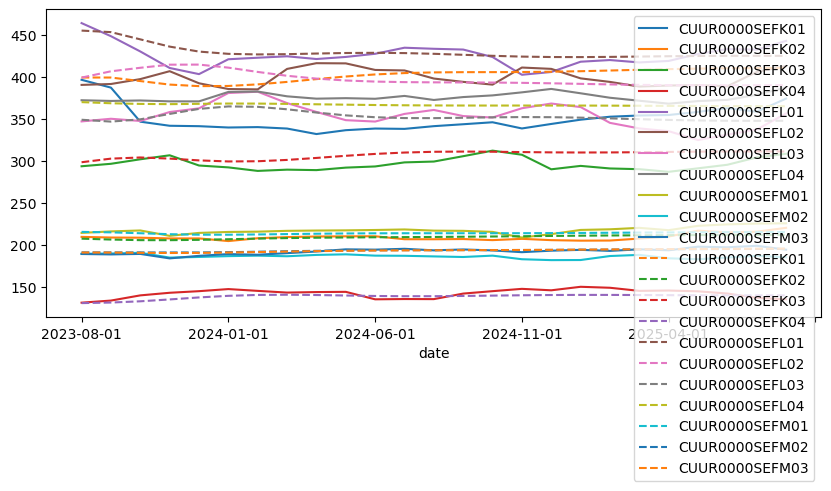

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4))
test.plot(ax=ax, label="Actual")
forecast_df.plot(ax=ax, label="Forecast", linestyle="--")
ax.legend()
plt.show()

## A todo list for VARIMA modeling
- [ ] VARIMA, VARMA ect modeling requires the process to be stationary, which can be tested in vector form or for each component variable. We should test if $CPI$ or $log(CPI)$ is stationary. This should be true since previous papers have used ARIMA/ARMA models which require this in the single variable case.
- [ ] Find a module for VARIMA modeling. The Darts module has this [here](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.varima.html) but also says it's just a wrapper for statsmodels which doesn't have a VARIMA model I could find
- [ ] rewrite the API to get a much data as possible for each 

# EDA

In [11]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df1_wide, tsmode=True, sort_by='date')
profile.to_file('profile_report.html')

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.11/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.11/u/import-error